In [1]:
import pandas as pd

# Replace 'your_file_name.xlsx' with the actual file name
df = pd.read_excel('cardechoclean.xlsx')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fuel_type                    5558 non-null   int64  
 1   body_type                    5558 non-null   int64  
 2   kilometers                   5558 non-null   int64  
 3   transmission                 5558 non-null   int64  
 4   owner_number                 5558 non-null   int64  
 5   oem                          5558 non-null   int64  
 6   model                        5558 non-null   int64  
 7   model_year                   5558 non-null   int64  
 8   central_variant_id           5558 non-null   int64  
 9   variant_name                 5558 non-null   int64  
 10  price                        5558 non-null   float64
 11  insurance_validity           5558 non-null   int64  
 12  fuel_type_overview           5558 non-null   int64  
 13  kms_driven        

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

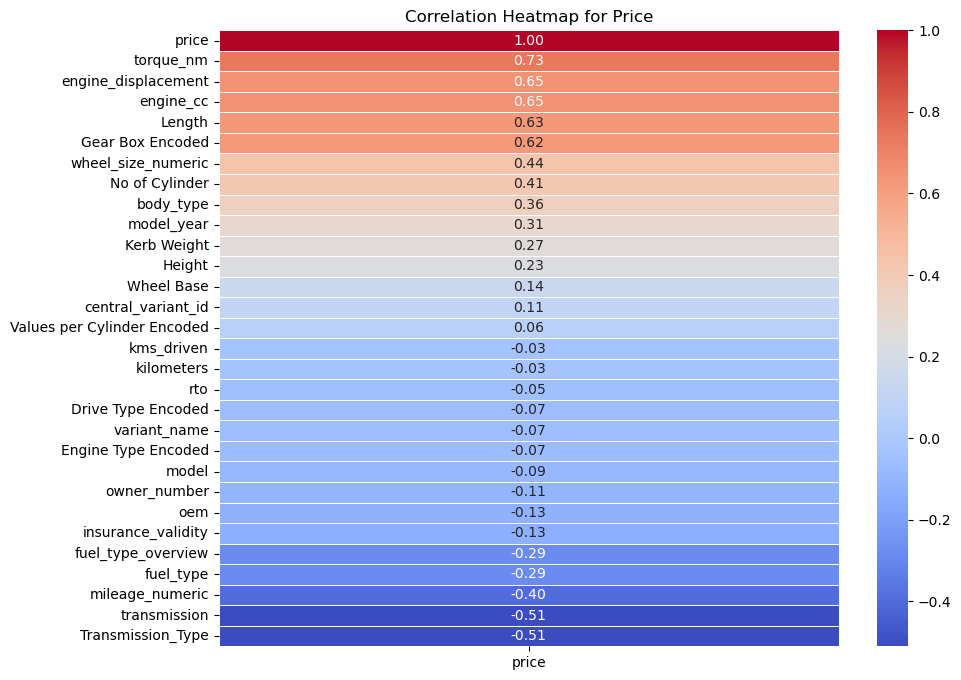

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Extract correlations with 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Create a heatmap for price correlations
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(price_correlations), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Price')
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


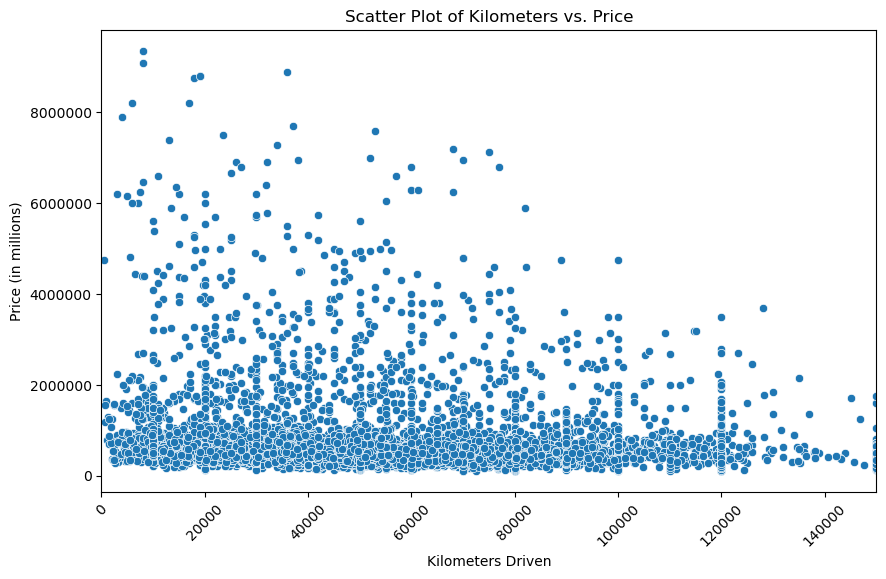

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for kilometers and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price', data=df)
plt.title('Scatter Plot of Kilometers vs. Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in millions)')
plt.xlim(0, 150000)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')# Disable scientific notation for x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


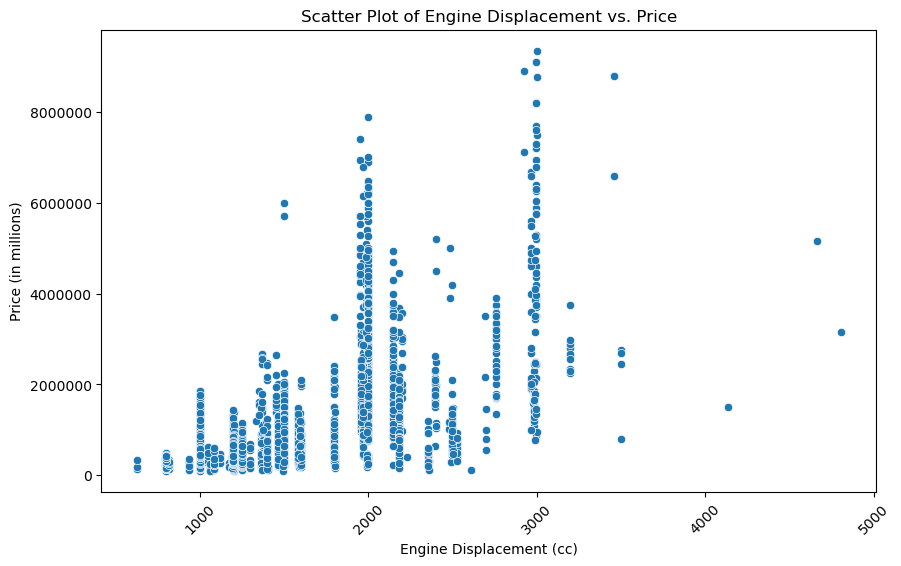

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for engine_cc and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_cc', y='price', data=df)
plt.title('Scatter Plot of Enginecc vs. Price')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Price (in millions)')

# Set the range for the x-axis and y-axis if needed
# plt.xlim(0, max_engine_cc)  # Adjust the values based on your data
# plt.ylim(0, max_price)  # Adjust the values based on your data
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [19]:
#Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numeric columns for scaling
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the scaled DataFrame
print(df.head())

   fuel_type  body_type  kilometers  transmission  owner_number       oem  \
0       1.00        0.9    0.012638           0.0          0.50  0.935484   
1       1.00        0.3    0.004270           1.0          0.00  0.129032   
2       1.00        0.8    0.001200           0.0          0.00  0.838710   
3       0.25        0.8    0.009001           0.0          0.25  0.000000   
4       1.00        0.3    0.006388           0.0          0.00  0.645161   

      model  model_year  central_variant_id  variant_name  ...  Kerb Weight  \
0  0.889632    0.571429            0.193175      0.561345  ...     0.426339   
1  0.120401    0.714286            0.477233      0.777830  ...     0.769196   
2  0.759197    0.904762            0.761566      0.672193  ...     0.406696   
3  0.020067    0.571429            0.008486      0.322596  ...     0.422321   
4  0.591973    0.761905            0.642851      0.839886  ...     0.091518   

   Transmission_Type  mileage_numeric  engine_cc  torque_nm  \

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_selection import SelectFromModel

In [23]:
# Assuming 'price' is your target variable
X = df.drop(['price'], axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

# Evaluate
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))
print("MSE:", mean_squared_error(y_test, linear_reg_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, linear_reg_pred)))
print("R-squared:", r2_score(y_test, linear_reg_pred))

Linear Regression:
MAE: 0.030964008152290702
MSE: 0.0026627955757648272
RMSE: 0.051602282660409775
R-squared: 0.7617478273346049


In [26]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R-squared:", r2_score(y_test, rf_pred))


Random Forest:
MAE: 0.01351936973047045
MSE: 0.0008856902741257477
RMSE: 0.029760548955382993
R-squared: 0.9207533488339754


In [27]:
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

# Evaluate
print("\nSupport Vector Regression:")
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("MSE:", mean_squared_error(y_test, svr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))
print("R-squared:", r2_score(y_test, svr_pred))


Support Vector Regression:
MAE: 0.03926238057083554
MSE: 0.002433038722843656
RMSE: 0.04932584234297125
R-squared: 0.782305195647608


In [28]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

# Evaluate
print("\nXGBoost:")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("R-squared:", r2_score(y_test, xgb_pred))


XGBoost:
MAE: 0.012162860314577532
MSE: 0.0007503376522057828
RMSE: 0.027392291839234313
R-squared: 0.9328639503919366


C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorica

In [30]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

nn_pred = model.predict(X_test).flatten()

# Evaluate
print("\nNeural Network:")
print("MAE:", mean_absolute_error(y_test, nn_pred))
print("MSE:", mean_squared_error(y_test, nn_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, nn_pred)))
print("R-squared:", r2_score(y_test, nn_pred))

35/35 [==============================] - 0s 608us/step

Neural Network:
MAE: 0.016764842538783103
MSE: 0.0010679725017315072
RMSE: 0.032679848557352696
R-squared: 0.9044437465646062


In [32]:
# Fit a random forest model to get feature importances
rf_feature_importances = RandomForestRegressor(random_state=42).fit(X_train, y_train).feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))

               Feature  Importance
24  wheel_size_numeric    0.476195
7           model_year    0.096400
28    Gear Box Encoded    0.093676
23           torque_nm    0.089767
18          Wheel Base    0.051271
16              Length    0.041880
19         Kerb Weight    0.015770
17              Height    0.014524
12          kms_driven    0.014006
2           kilometers    0.013110


In [33]:
#Hyperparmeter 

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_xgb_model = xgb.XGBRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

# Fit the model to the data
best_xgb_model.fit(X_train, y_train)

# Evaluate the performance of the tuned model
y_pred_tuned = best_xgb_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    print(f"MAE: {mae:.6f}")
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"R-squared: {r2:.6f}")

evaluate_model(y_test, y_pred_tuned)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x0000023F422C2CE0>>
Traceback (most recent call last):
  File "C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\core.py", line 588, in _next_wrapper
    
KeyboardInterrupt: 
Exception ignored in: <function DataIter.__del__ at 0x0000023F25014D30>
Traceback (most recent call last):
  File "C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\core.py", line 578, in __del__
    def __del__(self) -> None:
AssertionError: 
Exception ignored in: <function DataIter.__del__ at 0x0000023F25014D30>
Traceback (most recent call last):
  File "C:\Users\Rajasekar\anaconda3\lib\site-packages\xgboost\core.py", line 578, in __del__
    def __del__(self) -> None:
AssertionError: 
